# Waiter Tips Prediction

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("tips.csv")
data_copy = data.copy(deep=True)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
data.shape

(244, 7)

In [6]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [129]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [130]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [131]:
figure = px.scatter(data_frame = data, x="total_bill", y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [132]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [133]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

In [134]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

In [135]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

## Waiter Tips Prediction Model

In [136]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [137]:
x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [139]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])

## Finding Accuracy

In [140]:
from sklearn.metrics import r2_score

In [141]:
# training data prediction
train_predict = model.predict(xtrain)
r2_score(ytrain, train_predict)

0.45653112545009544

In [142]:
# testing prediction
test_predict = model.predict(xtest)
r2_score(ytest, test_predict)

0.44293996874899033

The model is not good for the data

### Ridge Regression

In [143]:
data1 = data_copy.copy(deep=True)
data1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
data1 = pd.get_dummies(data)
data1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [145]:
x = data1.iloc[:,:-1]
y = np.array(data1["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [146]:
from sklearn.linear_model import Ridge
model1 = Ridge()
model1.fit(xtrain, ytrain)

Ridge()

In [147]:
from sklearn.metrics import r2_score

In [148]:
# training data prediction
train_predict = model1.predict(xtrain)
r2_score(ytrain, train_predict)

0.9999887058400171

In [149]:
# testing prediction
test_predict = model1.predict(xtest)
r2_score(ytest, test_predict)

0.9999895951219898

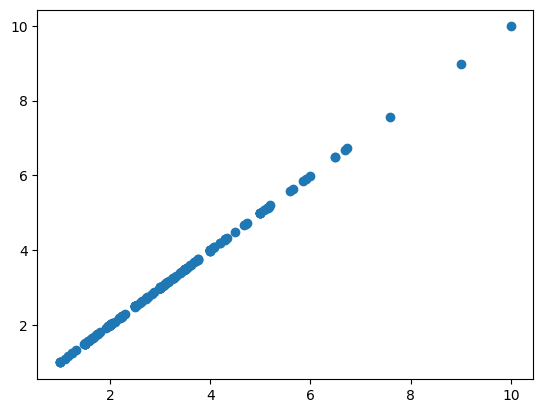

In [150]:
plt.scatter(ytrain, train_predict)

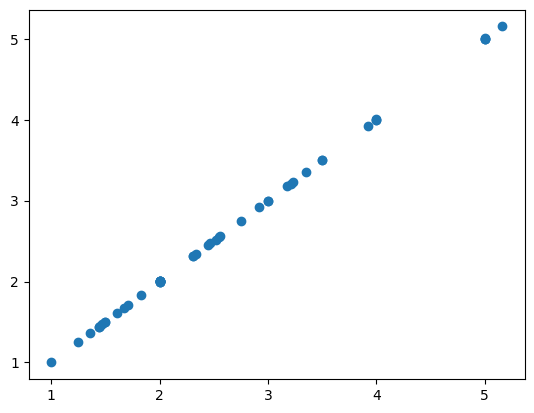

In [151]:
plt.scatter(ytest, test_predict)

wow! its good to see the Straight line, Ridge regression is the good model for the data